In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from google.colab import drive

# url = "https://docs.google.com/spreadsheets/d/1TKHqXn9KjFKOnhvjfoQKCaPafj-eb1K6Z_B3mCglziA/gviz/tq?tqx=out:csv&gid=901704468"
url = "performance_10_nodes.csv"

df = pd.read_csv(url)
df

,Executed MPI Program,Number of MPI Processes,Execution Time (ms),Memory Usage (KB)
0,raft.c,3,12802.19,1424
1,raft.c,3,12953.72,1424
2,raft.c,3,16996.52,1428
3,raft.c,3,6583.92,1424
4,raft.c,3,12707.57,1428
...,...,...,...,...
2395,hotstuff.c,10,126.30,1424
2396,hotstuff.c,10,125.91,1424
2397,hotstuff.c,10,126.56,1408
2398,hotstuff.c,10,126.25,1424


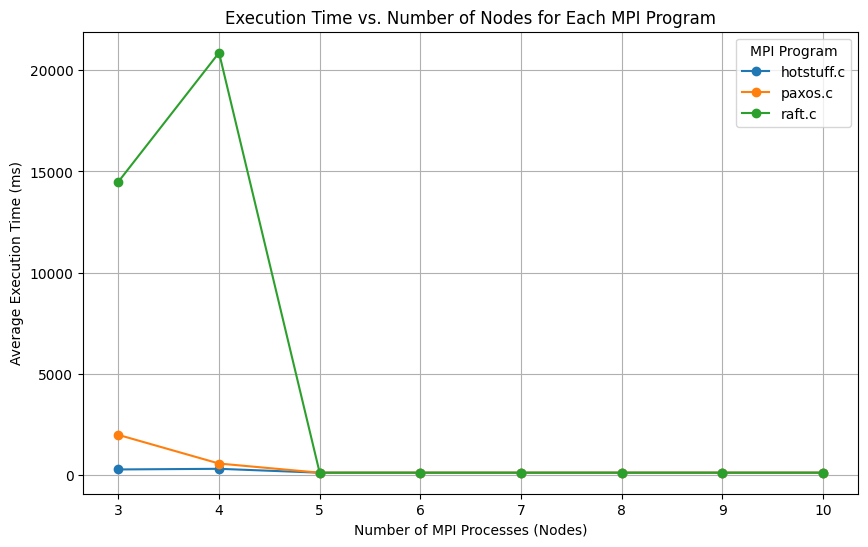

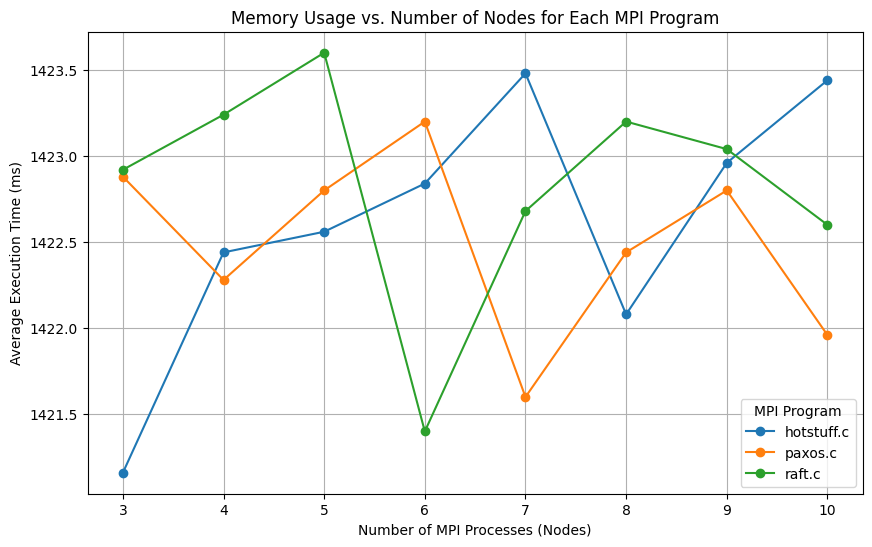

In [5]:
grouped_df = df.groupby(["Executed MPI Program", "Number of MPI Processes"])["Execution Time (ms)"].mean().reset_index()

plt.figure(figsize=(10, 6))
for program in grouped_df["Executed MPI Program"].unique():
    subset = grouped_df[grouped_df["Executed MPI Program"] == program]
    plt.plot(
        subset["Number of MPI Processes"],
        subset["Execution Time (ms)"],
        marker="o",
        linestyle="-",
        label=program
    )

plt.xlabel("Number of MPI Processes (Nodes)")
plt.ylabel("Average Execution Time (ms)")
plt.title("Execution Time vs. Number of Nodes for Each MPI Program")
plt.xticks(sorted(df["Number of MPI Processes"].unique()))  # Ensure correct node labels
plt.legend(title="MPI Program")
plt.grid(True)

plt.show()
#=========================================================================================================================
grouped_df = df.groupby(["Executed MPI Program", "Number of MPI Processes"])["Memory Usage (KB)"].mean().reset_index()

plt.figure(figsize=(10, 6))
for program in grouped_df["Executed MPI Program"].unique():
    subset = grouped_df[grouped_df["Executed MPI Program"] == program]
    plt.plot(
        subset["Number of MPI Processes"],
        subset["Memory Usage (KB)"],
        marker="o",
        linestyle="-",
        label=program
    )

plt.xlabel("Number of MPI Processes (Nodes)")
plt.ylabel("Average Execution Time (ms)")
plt.title("Memory Usage vs. Number of Nodes for Each MPI Program")
plt.xticks(sorted(df["Number of MPI Processes"].unique()))  # Ensure correct node labels
plt.legend(title="MPI Program")
plt.grid(True)

plt.show()

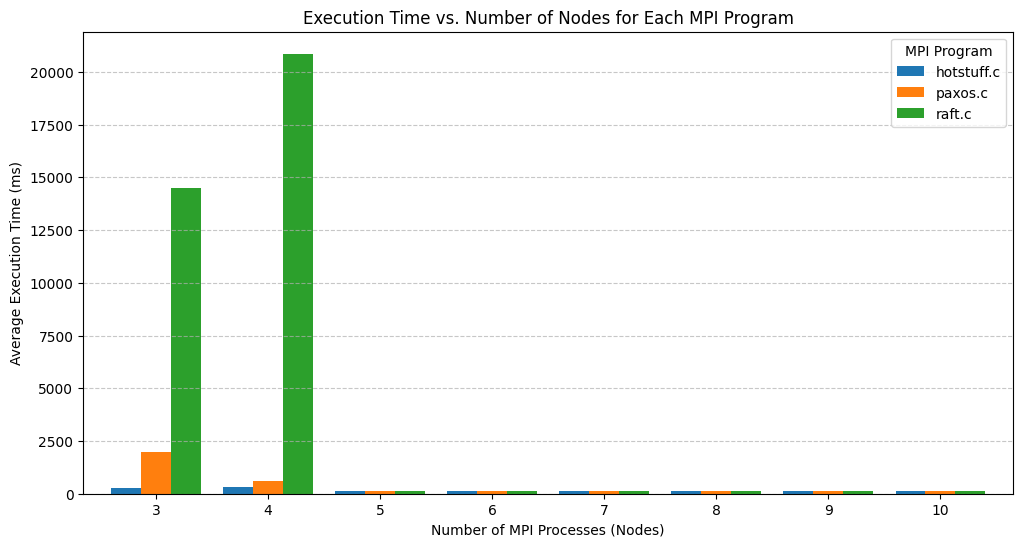

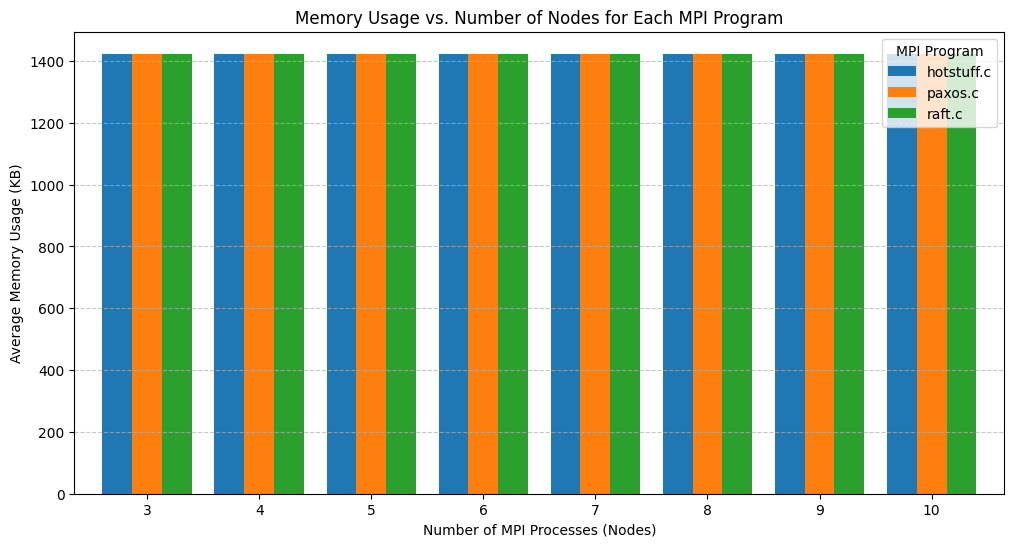

In [6]:
grouped_df = df.groupby(["Executed MPI Program", "Number of MPI Processes"])["Execution Time (ms)"].mean().reset_index()

pivot_df = grouped_df.pivot(index="Number of MPI Processes", columns="Executed MPI Program", values="Execution Time (ms)")
ax = pivot_df.plot(kind="bar", figsize=(12, 6), width=0.8)

plt.xlabel("Number of MPI Processes (Nodes)")
plt.ylabel("Average Execution Time (ms)")
plt.title("Execution Time vs. Number of Nodes for Each MPI Program")
plt.xticks(rotation=0)  # Keep node counts readable
plt.legend(title="MPI Program")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()
#======================================================================================================================================
grouped_df = df.groupby(["Executed MPI Program", "Number of MPI Processes"])["Memory Usage (KB)"].mean().reset_index()

pivot_df = grouped_df.pivot(index="Number of MPI Processes", columns="Executed MPI Program", values="Memory Usage (KB)")
ax = pivot_df.plot(kind="bar", figsize=(12, 6), width=0.8)

plt.xlabel("Number of MPI Processes (Nodes)")
plt.ylabel("Average Memory Usage (KB)")
plt.title("Memory Usage vs. Number of Nodes for Each MPI Program")
plt.xticks(rotation=0)  # Keep node counts readable
plt.legend(title="MPI Program")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()